In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


num_lines = 40428968
sample_size = 100000
skip = sorted(random.sample(range(1, num_lines), num_lines-sample_size))

In [2]:
import pandas as pd

df = pd.read_csv('train.gz', header=0, skiprows=skip)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                99999 non-null  uint64
 1   click             99999 non-null  int64 
 2   hour              99999 non-null  int64 
 3   C1                99999 non-null  int64 
 4   banner_pos        99999 non-null  int64 
 5   site_id           99999 non-null  object
 6   site_domain       99999 non-null  object
 7   site_category     99999 non-null  object
 8   app_id            99999 non-null  object
 9   app_domain        99999 non-null  object
 10  app_category      99999 non-null  object
 11  device_id         99999 non-null  object
 12  device_ip         99999 non-null  object
 13  device_model      99999 non-null  object
 14  device_type       99999 non-null  int64 
 15  device_conn_type  99999 non-null  int64 
 16  C14               99999 non-null  int64 
 17  C15         

In [3]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1,1006958220126877439,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
2,10091458153276608983,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
3,103250964972173685,0,14102100,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17653,300,250,1994,2,39,-1,33
4,10447359675376765576,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157


In [4]:
df['hour'].value_counts()

14102209    1088
14102813    1065
14102210    1059
14102814     984
14102212     956
            ... 
14102502      90
14102420      70
14102423      62
14102421      47
14102422      38
Name: hour, Length: 240, dtype: int64

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,99999.0,NaN,NaN,NaN,9225507433603274752.0,5317900022276816896.0,82848986010454.0,4627864442575608832.0,9215817656371994624.0,13837361437098051584.0,18446653833922121728.0
click,99999.0,NaN,NaN,NaN,0.167622,0.373532,0.0,0.0,0.0,0.0,1.0
hour,99999.0,NaN,NaN,NaN,14102558.587186,296.052779,14102100.0,14102304.0,14102602.0,14102814.0,14103023.0
C1,99999.0,NaN,NaN,NaN,1004.96104,1.08709,1001.0,1005.0,1005.0,1005.0,1012.0
banner_pos,99999.0,NaN,NaN,NaN,0.289993,0.513069,0.0,0.0,0.0,1.0,7.0
site_id,99999,1458,85f751fd,35894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_domain,99999,1352,c4e18dd6,37295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_category,99999,19,50e219e0,40787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_id,99999,1316,ecad2386,64105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_domain,99999,99,7801e8d9,67440,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head().T

,0,1,2,3,4
id,10000679056417042096,1006958220126877439,10091458153276608983,103250964972173685,10447359675376765576
click,0,0,0,0,0
hour,14102100,14102100,14102100,14102100,14102100
C1,1005,1005,1005,1005,1005
banner_pos,1,0,0,0,0
site_id,fe8cc448,1fbe01fe,1fbe01fe,6c5b482c,543a539e
site_domain,9166c161,f3845767,f3845767,7687a86e,c7ca3108
site_category,0569f928,28905ebd,28905ebd,3e814130,3e814130
app_id,ecad2386,ecad2386,ecad2386,ecad2386,ecad2386
app_domain,7801e8d9,7801e8d9,7801e8d9,7801e8d9,7801e8d9


#### Dropping text columns, target variable, and seemingly useless features

In [7]:
X = df.select_dtypes('number').drop(['id','click'],axis=1) #,'device_type'
y = df['click']

X.shape

(99999, 13)

#### Normalizing dataset using Z-Score

In [8]:
X = (X - X.mean()) / X.std()

X.head()

,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-1.549005,0.035839,1.383842,-0.022654,-0.385274,0.030413,0.053672,-0.214334,0.078259,-1.084983,-0.547588,-1.067177,1.056094
1,-1.549005,0.035839,-0.565212,-0.022654,-0.385274,-0.632601,0.053672,-0.214334,-0.643109,-1.084983,-0.547588,-1.067177,-0.056725
2,-1.549005,0.035839,-0.565212,-0.022654,-0.385274,-0.632601,0.053672,-0.214334,-0.643109,-1.084983,-0.547588,-1.067177,-0.056725
3,-1.549005,0.035839,-0.565212,-0.022654,-0.385274,-0.240040,-0.887100,3.993276,-0.196157,0.423368,-0.536186,-1.067177,-0.713004
4,-1.549005,0.035839,-0.565212,-0.022654,-0.385274,0.306719,0.053672,-0.214334,0.360890,-1.084983,-0.536186,-1.067177,1.056094


#### Evaluating imbalance of dataset

In [9]:
y.value_counts(normalize=True)

0    0.832378
1    0.167622
Name: click, dtype: float64

#### Instantiating, Training, and calling feature_importances_ attribute on RandomForest model to evaluate our features' predictive power

In [10]:
%%time

rf = RandomForestClassifier(class_weight='balanced')

rf_feature_importances = pd.DataFrame(rf.fit(X,y).feature_importances_,index=[i for i in X.columns],columns=['Feature Importances']).sort_values(by='Feature Importances', ascending=False)
rf_feature_importances[:15]

Wall time: 25.2 s


,Feature Importances
hour,0.576899
C14,0.129982
C20,0.093384
C17,0.039228
C21,0.033684
C19,0.024802
device_conn_type,0.024324
C16,0.019182
C18,0.018030
banner_pos,0.016442


#### Reducing feature dimension using RandomForest Feature Importance Attribute
* Decided to omit this step because simply dropping text columns reduced feature dimension significantly enough.

In [11]:
# features = rf_feature_importances[rf_feature_importances['Feature Importances'] > 0.01].index
# print(features)
# X = X[features]

#### Training and Score Plotting various models on dataset 
* Default/Minimal parameter tuning.

Wall time: 9min 34s


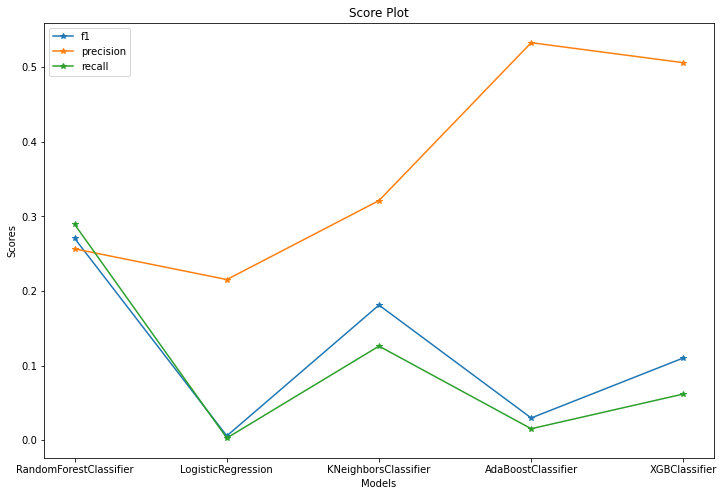

In [12]:
%%time

# Don't forget a StackClassifier using top models

log = LogisticRegression()
rf = RandomForestClassifier(class_weight='balanced')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False,verbosity=0)

models = [rf, log, knn, ada, xgb]
metrics = ['f1', 'precision', 'recall']

# Function to score an array of machine learning algorithms on the dataset
def score_models(X, y, models, metrics, folds): 
    
    # plots scorings
    # I want this function to ALSO return confusion matrix object, roc/auc plot object,
    # precision/recall plot object, [tp,fp,tn,fn] or rates, 
    # recall, precision, f1, Matthews correlation coeficient
    
    p = np.random.permutation(len(X))
    X, y = X.iloc[p], y.iloc[p]
    
    model_scores = {}
    
    for model in models: #replace with cross_val_score for metric in metrics
        
        scores = []
        
        for metric in metrics:
            score = cross_val_score(model, X, y, cv = folds, scoring = metric) #returns avg score per metric
            # after this runs, save that score before next iteration
        
            scores.append(score.mean())
            # saves score for that metric to dictionary where metric is key, score is value
        
        model_scores[str(model)] = scores
    
    plt.figure(figsize=(12,8))
    score_plot = plt.plot([x.split('(')[0] for x in model_scores.keys()], model_scores.values(), marker='*')
    plt.legend(metrics)
    plt.title('Score Plot')
    plt.xlabel('Models')
    plt.ylabel('Scores')
    
    return score_plot

score_models(X, y, models, metrics, 3)

#### GridSearching best model

In [13]:
# GridSearch Here

#### Scoreplotting hyperparameter tuned best model

In [14]:
# Scoreplot hyperparameter tuned best model here

In [15]:
# Done for the day 10/22/2021 

# Maybe try to handle more data?
# Can you do some feature engineering?

In [17]:
# Compare other models

In [ ]:
# Reformat hour column to prevent overfitting
# Break hour column into year, month, day,
# Break day into morning/afternoon/night etc

